<a href="https://colab.research.google.com/github/mdpatel2/MSAAI-521/blob/main/MSAAI_530_Final_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart Guide

1. Import the libraries
2. Mount Google Drive
3. Import all the CSVs


In [3]:
#quickstart only
all_sessions_df = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/all_sessions", index_col=0 , skipinitialspace = True)
grades_final_df = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/grades_final_df.csv", index_col=0 , skipinitialspace = True)
activities = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/activities.csv", index_col=0 , skipinitialspace = True)
cumsums = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/cumsums.csv")
pickups_df = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/other_pickups.csv", index_col=0 , skipinitialspace = True)

#Import libraries

In [1]:
import os, re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
from matplotlib.patches import FancyBboxPatch
import pandas as pd
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the data and making dataframes

**Note**: This section will save files to Google Drive so it only needs to be run once.

os.walk() returns a tuple for each dir it finds beyond the specified root. The tuple is the path, list of dirs, and list of files. So, we will loop through each dir. For each dir, return all the file paths. The way to return all the file paths is to os.path.join(path, file). But, ultimately we want to create a dictionary because it'll make it easier to access session data later. So, during each loop, we want to capture the session number. Once we have the dictionary, we can do some basic counts.

In [15]:
#where are the session recordings
processes = "/content/drive/MyDrive/MSAAI 530/EPM Dataset 2/Data/Processes"
#where will we store any combined csv files
save_path = "/content/drive/MyDrive/MSAAI 530/Final Project"
os.makedirs(save_path, exist_ok=True)  

In [ ]:
#loop through all the files in all the session folders
#make a dictionary that we will use later to create the dataframes
session_dict = {}
for root, subdirs, files in os.walk(processes):
  if tmp := re.search("Session ([0-3])", root): #get the session number
    num = tmp.group(1)
    session_dict[num] = [os.path.join(root, name) for name in files]

In [ ]:
#loop through all the files in all the session folders
#make a dictionary that we will use later to create the dataframes
session_dict_4 = {}
for root, subdirs, files in os.walk(processes):
  if tmp := re.search("Session ([0-4])", root): #get the session number
    num = tmp.group(1)
    session_dict_4[num] = [os.path.join(root, name) for name in files]

In [ ]:
#loop through all the files in all the session folders
#make a dictionary that we will use later to create the dataframes
session_dict_5 = {}
for root, subdirs, files in os.walk(processes):
  if tmp := re.search("Session ([0-5])", root): #get the session number
    num = tmp.group(1)
    session_dict_5[num] = [os.path.join(root, name) for name in files]

Now that we have all of the file paths in a dictionary, lets loop through the dictionary and make one giant dataframe. But, so we don't have to repeat this step, we'll save all the dataframes as files. We'll end up with one file for each session, plus one more for all the sessions combined. During this process, we'll add some basic error handling and user interactions so that there's no wait time if it'a already been run once and we accidentally run it again.


In [ ]:
#the csv does not have headers so we list them here
col_names = ["session", "student_Id", "exercise", "activity", "start_time", "end_time", "idle_time", "mouse_wheel", "mouse_wheel_click",
"mouse_click_left", "mouse_click_right", "mouse_movement", "keystroke"]

In [ ]:
#initialize df to store all sessions
all_session_df = pd.DataFrame(columns = col_names)
for session, recordings in session_dict.items():
  filename = "session_" + session
  print(f"Starting {filename}...") #user feedback
  #initialize df to store session
  session_df = pd.DataFrame(columns = col_names)
  #concat all the csv in the session directory in a df
  for recording in recordings:
    tmp_df = pd.read_csv(recording, names = col_names)
    session_df = pd.concat([session_df, tmp_df])
  #after exiting the loop, save the session df to google drive
  session_df.to_csv(os.path.join(save_path, filename))
  #add the session to all_sessions_df
  all_session_df = pd.concat([all_session_df, session_df])
#after exiting the loop, save the all session file
all_session_df.to_csv(os.path.join(save_path, "all_sessions_3"))
print(f"Done.")

Starting session_2...
Starting session_1...
Starting session_3...
Done.


In [ ]:
#initialize df to store all sessions
all_session_df_4 = pd.DataFrame(columns = col_names)
for session, recordings in session_dict_4.items():
  filename = "session_" + session
  print(f"Starting {filename}...") #user feedback
  #initialize df to store session
  session_df = pd.DataFrame(columns = col_names)
  #concat all the csv in the session directory in a df
  for recording in recordings:
    tmp_df = pd.read_csv(recording, names = col_names)
    session_df = pd.concat([session_df, tmp_df])
  #after exiting the loop, save the session df to google drive
  session_df.to_csv(os.path.join(save_path, filename))
  #add the session to all_sessions_df
  all_session_df_4 = pd.concat([all_session_df_4, session_df])
#after exiting the loop, save the all session file
all_session_df_4.to_csv(os.path.join(save_path, "all_sessions_4"))
print(f"Done.")

Starting session_2...
Starting session_1...
Starting session_3...
Starting session_4...
Done.


In [ ]:
#initialize df to store all sessions
all_session_df_5 = pd.DataFrame(columns = col_names)
for session, recordings in session_dict_5.items():
  filename = "session_" + session
  print(f"Starting {filename}...") #user feedback
  #initialize df to store session
  session_df = pd.DataFrame(columns = col_names)
  #concat all the csv in the session directory in a df
  for recording in recordings:
    tmp_df = pd.read_csv(recording, names = col_names)
    session_df = pd.concat([session_df, tmp_df])
  #after exiting the loop, save the session df to google drive
  session_df.to_csv(os.path.join(save_path, filename))
  #add the session to all_sessions_df
  all_session_df_5 = pd.concat([all_session_df_5, session_df])
#after exiting the loop, save the all session file
all_session_df_5.to_csv(os.path.join(save_path, "all_sessions_5"))
print(f"Done.")

Starting session_2...
Starting session_1...
Starting session_5...
Starting session_3...
Starting session_4...
Done.


# Session statistics

In this section we aim discover whether the dataset comports with the provided description. We will uncover the number of:

* Students participating
* Sessions
* Student recordings
* Student recordings per sesssion
* Observations per student
* Oberservations per student per session

The way we'll do this is by using df.groupby().size().describe().
* groupby() let's us organized the data by session and/or by student ID.
* size() then allows us to count the rows in those groups including null rows.
* describe() then gives us basic stats. We are only interested in count, mean, min, and max.

In [3]:
#load the consolidated csv that we created
all_sessions_df = pd.read_csv("/content/drive/MyDrive/MSAAI 530/Final Project/all_sessions", index_col=0 , skipinitialspace = True)

In [ ]:
#group all records by student id
#get statistics on observations per student
recordings_by_student_desc = (all_sessions_df.groupby(by="student_Id")
  .size().describe().map(lambda x: int(x)))
total_students = recordings_by_student_desc['count']
print(f"Total num of students: {total_students}")
print(f"Observations per student across all sessions:")
print(f"{recordings_by_student_desc[['mean', 'min', 'max']]}")

Total num of students: 115
Observations per student across all sessions:
mean    2002
min      253
max     4061
dtype: int64


In [ ]:
#group all records by session and then by student id
#get statistics on obervations per student per session
recordings_by_session_desc = all_sessions_df.groupby(by=["session", "student_Id"]).size().describe().map(lambda x: int(x))
total_recordings = recordings_by_session_desc['count']
print(f"Total num of recordings: {total_recordings}")
print(f"Observations per student per session:")
print(f"{recordings_by_session_desc[['mean', 'min', 'max']]}")

Total num of recordings: 520
Observations per student per session:
mean     442
min       87
max     1087
dtype: int64


In [ ]:
#as_index causes a dataframe to be returned
session_size = (all_sessions_df
                .groupby(by=["session", "student_Id"], as_index=False).size()
                .groupby(by=["session"], as_index=False).size())
total_sessions = len(session_size['session'].index)
total_recordings_per_session = session_size['size'].sum()
print(f"Total Lab Sessions:\t\t {total_sessions}")

Total Lab Sessions:		 6


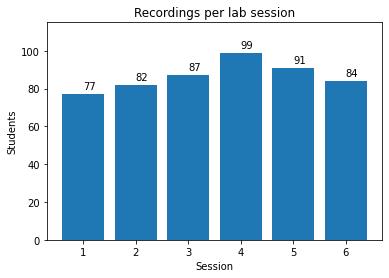

In [ ]:
#plot the number of recordings per session
bars, heights = session_size["session"], session_size["size"]
plt.xlabel("Session")
plt.ylabel("Students")
plt.ylim(0, 115)
plt.bar(bars, heights)
plt.title("Recordings per lab session")
for i in range(len(bars)):
  plt.text(i+1,heights[i]+2.5,heights[i]);

# Grade statistics

## Final exam grades

The file final_grades.xlsx refers to the final exam. This spreadsheet contains the points earned per question. Each question is associated to learnings in a specific lab session exercise.

The exam was held twice and the results are in two sheets. Some students took the exam twice and so some Student IDs are repeated. Some students who attended the course did not take the final exam, therefore, some Ids are missing in final grades.

In [18]:
path = "/content/drive/MyDrive/MSAAI 530/EPM Dataset 2/Data/final_grades.xlsx"
tmp = pd.read_excel(path, sheet_name=[0,1])
#this has the effect of preferring the first grade if the student took the exam twice
grades_final_df = (pd.concat([tmp[0], tmp[1]])
  .drop_duplicates(subset=["Student ID"], keep="first")
  .sort_values(by=["Student ID"])
  .set_index("Student ID"))

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
#save to drive
grades_final_df.to_csv(os.path.join(save_path, "grades_final_df.csv"))

In [15]:
grades_final_df.head()

,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
Student ID,,,,,,,,,,,,,,,,,
1,2.0,3.0,1.0,0.5,1.0,2,2.0,2.0,3.0,15.0,10.0,2.0,10.0,3.0,25.0,13.0,94.5
2,2.0,3.0,2.0,0.5,1.0,2,0.0,2.0,3.0,15.0,2.0,0.0,5.0,1.5,5.0,0.0,44.0
3,2.0,3.0,1.0,2.0,1.0,2,2.0,2.0,3.0,15.0,10.0,1.0,5.0,3.0,18.0,15.0,85.0
4,2.0,3.0,1.0,0.5,1.0,2,0.0,2.0,0.0,3.0,4.0,0.0,1.5,0.0,5.0,5.0,30.0
5,2.0,3.0,2.0,1.5,1.0,2,2.0,2.0,3.0,3.0,2.0,1.5,9.0,1.5,2.0,1.0,38.5


In [ ]:
#get basic statistics about final grades
(grades_final_df.iloc[:,-1:]
 .describe() #get statistics
 .T #transpose
 .reset_index(drop=True)[["count", "mean", "min", "max"]] #reset index
 .round(2)) #round the results

,count,mean,min,max
0,93.0,53.71,7.0,98.0


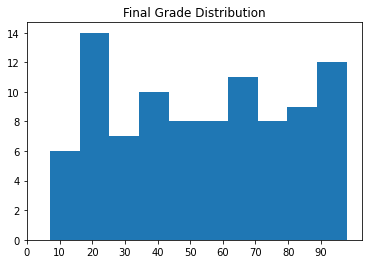

In [ ]:
# histogram of final grades
# final grades are already normalized
grades_final_df.iloc[:,-1:].hist()
plt.title("Final Grade Distribution")
plt.grid(False)
plt.xticks(range(0,100,10));

## Final exam breakdown

The final exam consisted of a series of questions where there was one question to represent each exercise in the set of 6 lab sessions. The questions were asked in the same order as the lab sessions, e.g., question one represented ES 1.1. We can use the structure of the exam to construct a timeline of learning. Below we calculate the final exam score after each question.

In [21]:
#cumulative average of final grade based on point aggregation
#https://www.statology.org/cumulative-average-python/
grades_final_ca = grades_final_df.drop(columns="TOTAL\n(100 points)").cumsum(axis=1)
#the points available for each question is tucked into header, we use regex to get it
avail_points = [int(re.search("([0-9]+) points", col).group(1)) for col in grades_final_ca.columns]
avail_pts_cumsum = pd.Series(avail_points).cumsum()
#normalize each of the grades
for i, col in enumerate(grades_final_ca):
  grades_final_ca[col]= round(grades_final_ca[col]/avail_pts_cumsum[i], 2)

In [113]:
grades_final_ca.head(10)

,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points)
Student ID,,,,,,,,,,,,,,,,
1,1.00,1.0,0.86,0.65,0.68,0.73,0.77,0.79,0.82,0.90,0.92,0.93,0.94,0.94,0.96,0.94
2,1.00,1.0,1.00,0.75,0.77,0.81,0.70,0.74,0.78,0.87,0.72,0.69,0.66,0.65,0.52,0.44
3,1.00,1.0,0.86,0.80,0.82,0.85,0.87,0.88,0.90,0.94,0.96,0.94,0.86,0.87,0.82,0.85
4,1.00,1.0,0.86,0.65,0.68,0.73,0.63,0.68,0.57,0.41,0.41,0.39,0.35,0.33,0.29,0.30
5,1.00,1.0,1.00,0.85,0.86,0.88,0.90,0.91,0.92,0.61,0.52,0.53,0.60,0.59,0.44,0.38
6,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.88,0.90,0.94,0.89,0.89,0.89,0.90,0.79,0.82
7,1.00,1.0,0.86,0.75,0.77,0.81,0.70,0.62,0.68,0.53,0.50,0.48,0.39,0.42,0.50,0.52
8,0.25,0.7,0.50,0.35,0.41,0.50,0.43,0.50,0.42,0.24,0.19,0.18,0.15,0.14,0.10,0.08
9,1.00,1.0,0.86,0.65,0.68,0.73,0.77,0.79,0.82,0.53,0.41,0.39,0.32,0.31,0.22,0.18


We can see a downward trend in many students after ES 3. Does this comport with student engagement with the learning materials? In other words, can we see in the recorded data whether less time was being spent on studies? We need to do some correlation plots to find out.

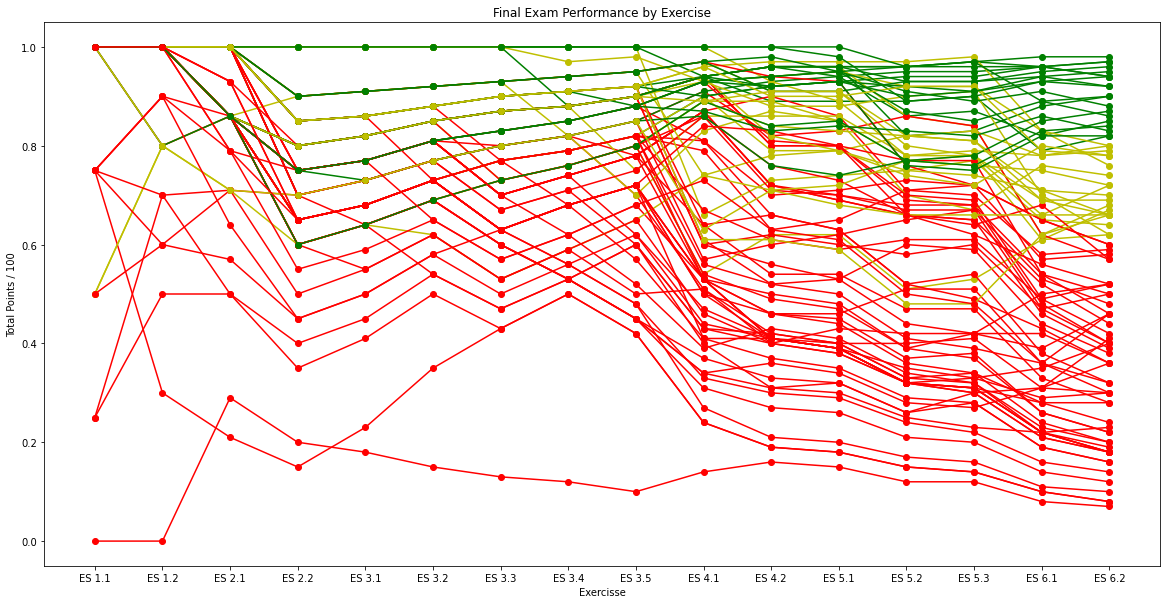

In [23]:
plt.figure(figsize=(20,10))
plt.title("Final Exam Performance by Exercise")
plt.xlabel("Exercisse")
plt.ylabel("Total Points / 100")
x_labels = grades_final_ca.columns.str.extract('(ES [0-9].[0-9])', expand=False)
for i in range(len(grades_final_ca)): #93 final grades
  fg = grades_final_ca.iloc[i,-1] #final grade is last column
  if fg > 0.80: color = 'g'
  elif fg > 0.60: color = 'y'
  else: color = 'r'
  plt.plot(x_labels, grades_final_ca.iloc[i,], marker='o', color=color)

# Study vs non-study time

In this section, we visualize how time is spent to validate that that there is an observable application usage pattern for each student. We take one A student and one F student. We can see that the failing student spent less time in the lab. We will investigate later whether this patter holds for all students. Something else worth investigating is the volume of application between learning and non-learning applications.

In [203]:
#keep only the columns that we need to make the time series
activities = all_sessions_df[["session", "student_Id", "exercise", "activity", "start_time", "end_time"]].copy()
#we will only use start time. each successive start time is the end time of the previous span
activities[['start_time', 'end_time']] = activities[['start_time', 'end_time']].apply(lambda x: pd.to_datetime(x))
#noticed that weirdly the Other activity has leading white space 
activities["activity"] = activities["activity"].str.strip()
#create a new column for the ordinally encoded activities: 1 for study, 0 for goofing off
activities["activity_en"] = activities["activity"].map(lambda x: 0 if x == "Other" else 1)

In [ ]:
#save to drive
activities.to_csv(os.path.join(save_path, "activities.csv"))

In [60]:
activities.head()

,session,student_Id,exercise,activity,start_time,end_time,activity_en
0,4,1,Es,Other,2014-11-13 11:08:14,2014-11-13 11:08:15,0
1,4,1,Es,Other,2014-11-13 11:08:16,2014-11-13 11:08:16,0
2,4,1,Es_4_1,Study_Es_4_1,2014-11-13 11:08:17,2014-11-13 11:08:20,1
3,4,1,Es_4_1,Blank,2014-11-13 11:08:21,2014-11-13 11:08:22,1
4,4,1,Es_4_2,Study_Es_4_2,2014-11-13 11:08:23,2014-11-13 11:08:25,1


In [36]:
#grab one A student and one F student
#melt combines start_time and end_time into one column
A = (pd.melt(activities.set_index(["session", "student_Id", "activity_en"]) #has the same effect as groupby
  .loc[1,1,:][["start_time", "end_time"]], ignore_index=False) #session 1, student 1
  .reset_index() #move indices back to columns
  .drop(columns=["session", "student_Id", "variable"])
  .rename(columns={"value": "time"})
  .sort_values("time"))
F = (pd.melt(activities.set_index(["session", "student_Id", "activity_en"])
  .loc[1,2,:][["start_time", "end_time"]], ignore_index=False)
  .reset_index()
  .drop(columns=["session", "student_Id", "variable"])
  .rename(columns={"value": "time"})
  .sort_values("time"))

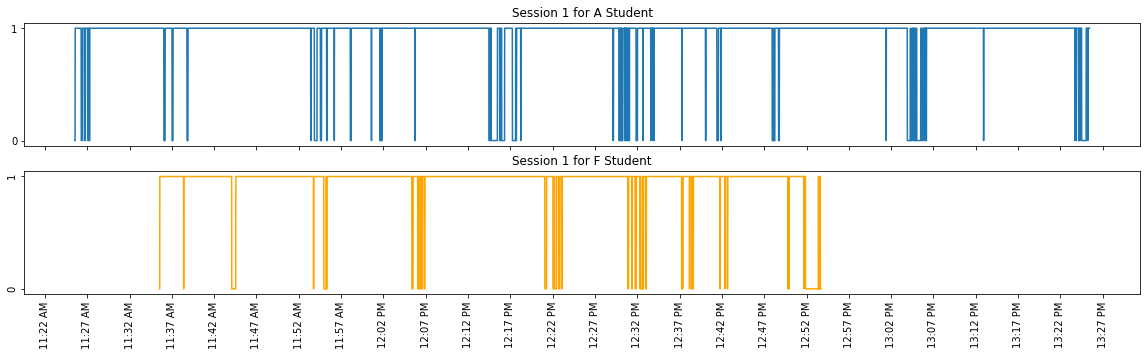

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,5), sharex = True)
# A student
ax1.set_yticks(ticks = [0,1])
ax1.set_title(f"Session 1 for A Student")
ax1.plot(A['time'], A["activity_en"])
# F student
ax2.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %p'))
ax2.tick_params(which='major', rotation=90)
ax2.set_yticks(ticks = [0,1])
ax2.set_title(f"Session 1 for F Student")
ax2.plot(F['time'],F["activity_en"], color='orange');

Below we look at the volume of application switching per student compared to final grade.

In [136]:
#count number of others over time
pickups_df = (activities.assign(pickups=activities["activity_en"].map(lambda x: 1 if x == 0 else 0))
              .drop(columns=["activity_en", "exercise", "activity", "session"])
              .groupby(by=["student_Id"]).sum()
              .join(grades_final_df.iloc[:,-1]).dropna()
              .rename(columns={"TOTAL\n(100 points)":"final_score"})
              .sort_values(by="pickups", ascending=False))

In [123]:
#save to drive
pickups_df.to_csv("/content/drive/MyDrive/MSAAI 530/Final Project/other_pickups.csv")

In [137]:
pickups_df.head()

,pickups,final_score
student_Id,,
4,776,30.0
20,731,58.5
30,669,7.0
66,619,86.0
67,598,80.5


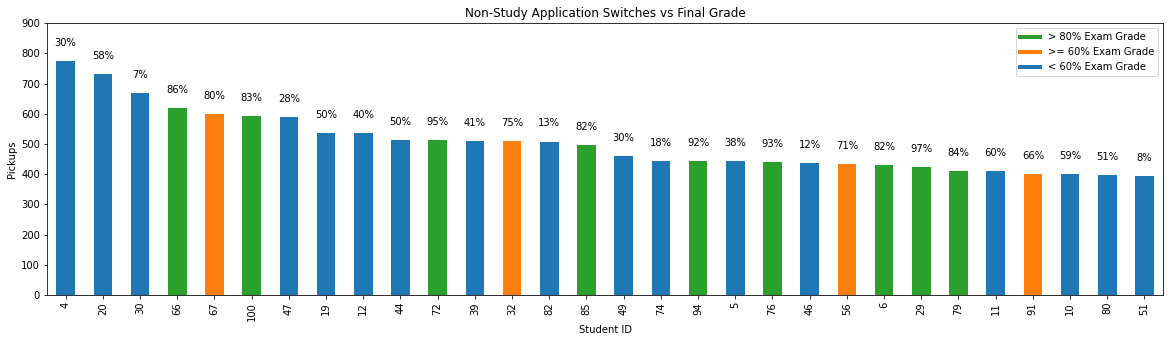

In [162]:
bars = 30
grade_label = pickups_df["final_score"].astype(int)
grade_color = ['tab:green' if fg > 80 else 'tab:orange' if fg > 60 else 'tab:blue' for fg in grade_label]

pickups_df["pickups"][:bars].plot(kind='bar', figsize=(20,5), color=grade_color)

plt.title("Non-Study Application Switches vs Final Grade")
plt.xlabel("Student ID")
plt.ylabel("Pickups")
plt.ylim(0,900)

for i,id in enumerate(pickups_df.index.values[:bars]):
  plt.text(i,pickups_df["pickups"].loc[id]+50,str(grade_label.loc[id]) + "%", ha="center")

#https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
custom_lines = [Line2D([0], [0], color="tab:green", lw=4),
                Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:blue", lw=4)]
plt.legend(custom_lines,['> 80% Exam Grade', '>= 60% Exam Grade', '< 60% Exam Grade']);

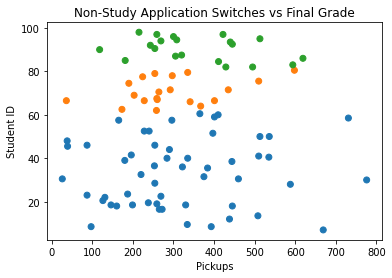

In [161]:
plt.scatter(pickups_df["pickups"], pickups_df["final_score"], c=grade_color)
plt.title("Non-Study Application Switches vs Final Grade")
plt.ylabel("Student ID")
plt.xlabel("Pickups");

#Study time vs grades

In this section, we create a series of visualizations to investigate volume of study time vs grade. We start by making a new dataframe that uses a rolling aggregation to see how activity time accumulates over the duration of the term.

In [204]:
#create a new dataframe with new cumsum columns
cumsums = activities.sort_values(by=["session", "student_Id"])
cumsums = cumsums.assign(
    time_spent=(cumsums["end_time"] - cumsums["start_time"]).dt.seconds, #duration of activity in seconds
    cum_study=np.nan,
    cum_time_spent=np.nan
)

In [205]:
#cumsum only the study time
session_ids = pd.unique(cumsums["session"])
student_ids = pd.unique(cumsums["student_Id"])
cumsums = cumsums.set_index(["session", "student_Id", "activity_en"])
lo, hi = min(session_ids), max(session_ids)
for i in range(lo, hi): #for each session
  for j in student_ids: # for each student
    #get study rows, cumsum them, and set back to cum_study
    try:
      cumsums.loc[(i,j,1), "cum_study"] = cumsums.loc[i,j,1]["time_spent"].cumsum()
    except KeyError: #happens when student was not in the session
      continue
    #cum_study will still have nans
    cumsums.loc[(i,j), "cum_study"].fillna(method="ffill", inplace=True)
    cumsums.loc[(i,j), "cum_study"].fillna(0, inplace=True)
    #cumsum the time spent for this student session
    cumsums.loc[(i,j, slice(None)), "cum_time_spent"] = cumsums.loc[(i,j, slice(None)), "time_spent"].cumsum()

<ipython-input-205-cbad05fcebcf>:10: PerformanceWarning: indexing past lexsort depth may impact performance.
  cumsums.loc[(i,j,1), "cum_study"] = cumsums.loc[i,j,1]["time_spent"].cumsum()
/usr/local/lib/python3.8/dist-packages/IPython/core/async_helpers.py:68: PerformanceWarning: indexing past lexsort depth may impact performance.
  coro.send(None)


In [ ]:
#save to drive
cumsums.to_csv(os.path.join(save_path, "cumsums.csv"))

In [13]:
cumsums.head()

exercise activity          start_time  \
session student_Id activity_en                                         
1       1          0                 Es    Other 2014-02-10 11:25:33   
                   1                 Es  Aulaweb 2014-02-10 11:25:35   
                   1                 Es    Blank 2014-02-10 11:25:43   
                   1                 Es    Deeds 2014-02-10 11:25:44   
                   0                 Es    Other 2014-02-10 11:26:18   

                                          end_time  time_spent  cum_study  \
session student_Id activity_en                                              
1       1          0           2014-02-10 11:25:34           1        0.0   
                   1           2014-02-10 11:25:42           7        7.0   
                   1           2014-02-10 11:25:43           0        7.0   
                   1           2014-02-10 11:26:17          33       40.0   
                   0           2014-02-10 11:26:18           0       40.0   

                                cum_time_spent  
session student_Id activity_en                  
1       1          0                       1.0  
                   1                       8.0  
                   1                       8.0  
                   1                      41.0  
                   0                      41.0

Now we create a new dataframe to calculate total time, total study time, and total non-study time.

In [24]:
#calculate other time
other_time_df = (cumsums
  .reset_index()
  .drop(columns=["session", "activity_en", "start_time", "end_time"])
  .groupby(by=["student_Id", "activity"])
  .sum()
  .xs('Other', level='activity') #https://www.somebits.com/~nelson/pandas-multiindex-slice-demo.html
  .sort_values(by="time_spent", ascending=False)
  .apply(lambda x: x/60).astype(int)
  .join(grades_final_ca.iloc[:,-1])
  .dropna()
  .rename(columns={"ES 6.2\n(15 points)": "final_grade", "time_spent": "other_time"}))

#calculate total study time
study_time_df = (cumsums
  .drop(columns=["cum_study","cum_time_spent"])
  .xs(1,level="activity_en")
  .groupby(by=["student_Id"])
  .sum()
  .apply(lambda x: x/60).astype(int)
  .rename(columns={"time_spent":"study_time"})
  )

#create a new dataframe to hold total, study, and other time
total_time_df = (cumsums
.drop(columns=["cum_study", "cum_time_spent"])
.groupby(by="student_Id")
.sum() #get total time spent
.apply(lambda x: x/60).astype(int)#convert to minutes
.sort_index()
.assign(
    other_time=other_time_df["other_time"], #add total other time
    study_time=study_time_df["study_time"]) #add toatal study time
.join(grades_final_ca.iloc[:,-1]) #add final grades
.dropna()
.rename(columns={"ES 6.2\n(15 points)": "final_grade", "time_spent":"total_time"})
)

In [27]:
total_time_df.head()

,total_time,other_time,study_time,final_grade
student_Id,,,,
1,631,13.0,618,0.94
2,643,17.0,625,0.44
3,473,9.0,464,0.85
4,707,34.0,673,0.30
5,659,25.0,633,0.38


The scatterplot shows that for total time and study time, there is a larger spread of time spent for low scoring students than mid and high.

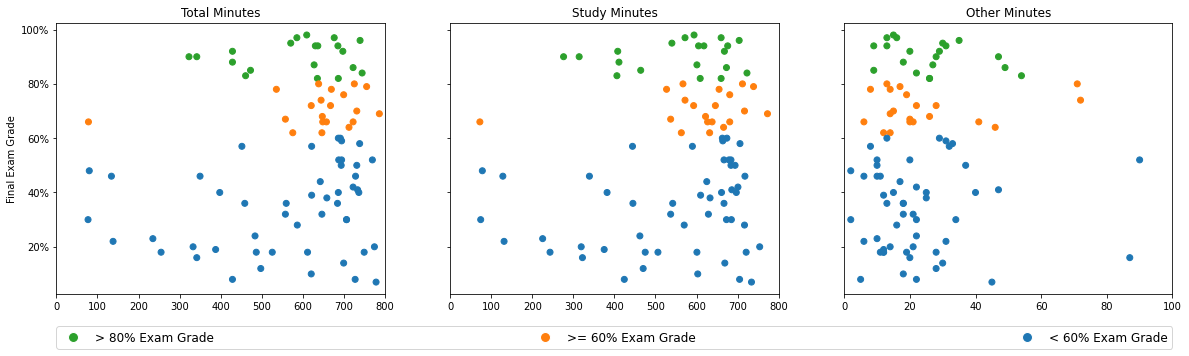

In [25]:
#scatterplot total, study, and other time vs grades
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5), sharey=True)
grade_label = total_time_df["final_grade"].map(lambda x: int(x*100))
grade_color = ['tab:green' if fg > 80 else 'tab:orange' if fg > 60 else 'tab:blue' for fg in grade_label]
ax1.scatter(total_time_df["total_time"], total_time_df["final_grade"], c=grade_color)
ax1.set_title("Total Minutes")
ax1.set_ylabel("Final Exam Grade")
ax1.set_xlim(0,800)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax2.scatter(total_time_df["study_time"], total_time_df["final_grade"], c=grade_color)
ax2.set_title("Study Minutes")
ax2.set_xlim(0,800)
ax3.scatter(total_time_df["other_time"], total_time_df["final_grade"], c=grade_color)
ax3.set_title("Other Minutes")
ax3.set_xlim(0,100)
legend_elements = [Line2D([0], [0], markerfacecolor="tab:green", color="w", marker="o", markersize=10),
                   Line2D([0], [0], markerfacecolor ="tab:orange", color="w", marker="o", markersize=10),
                   Line2D([0], [0], markerfacecolor="tab:blue", color="w", marker="o", markersize=10)]
font = font_manager.FontProperties(size=12)
ax1.legend(handles=legend_elements, prop=font,
           labels=['> 80% Exam Grade', '>= 60% Exam Grade', '< 60% Exam Grade'],
           bbox_to_anchor=(0., -0.2, 3.4, 0), ncol= 3, loc='lower left', mode="expand", borderaxespad=0.);

Below is an alternate view of non-study time versus grades. The bar chart is sorted to view the 20 students with the most non-study time. We expect to see more clear buckets if there were a strong correlation but there is not.

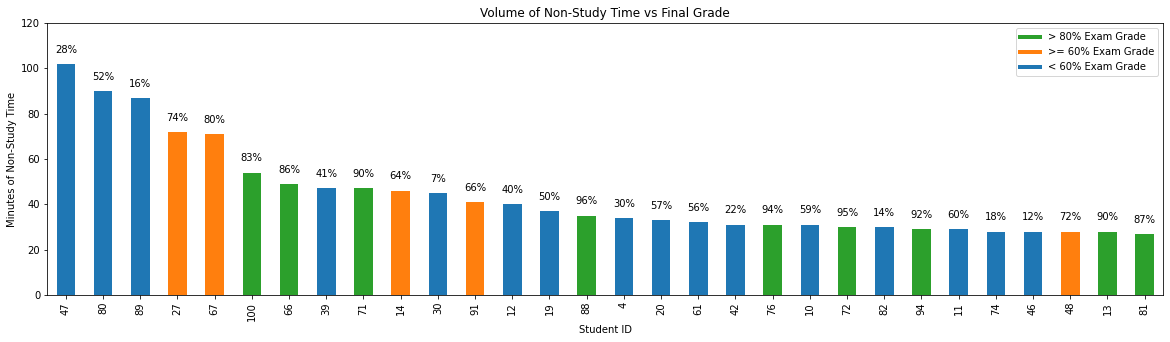

In [26]:
bars = 30
grade_label = other_time_df["final_grade"].map(lambda x: int(x*100))
grade_color = ['tab:green' if fg > 80 else 'tab:orange' if fg > 60 else 'tab:blue' for fg in grade_label]
other_time_df["other_time"][:bars].plot(kind='bar', figsize=(20,5), color=grade_color)

plt.title("Volume of Non-Study Time vs Final Grade")
plt.xlabel("Student ID")
plt.ylabel("Minutes of Non-Study Time")
plt.ylim(0,120)

for i,id in enumerate(other_time_df.index.values[:bars]):
  plt.text(i,other_time_df["other_time"].loc[id]+5,str(grade_label.loc[id]) + "%", ha="center")

#https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
custom_lines = [Line2D([0], [0], color="tab:green", lw=4),
                Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:blue", lw=4)]
plt.legend(custom_lines,['> 80% Exam Grade', '>= 60% Exam Grade', '< 60% Exam Grade']);

Finally we look at the spread of total time in three groups of students: high, mid, and low scoring students.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


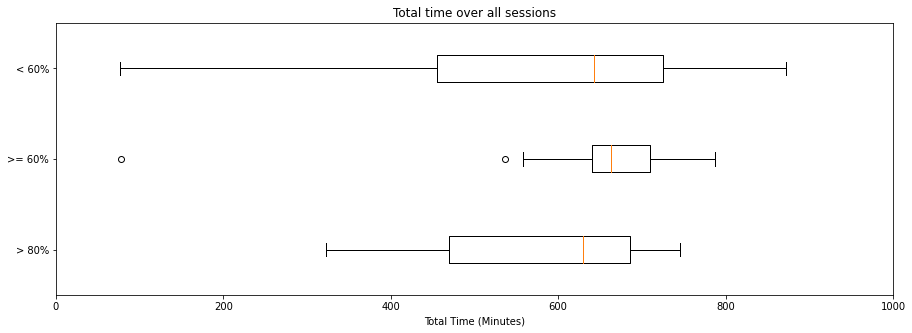

In [ ]:
#get rows according to final exam score
A_total_time = total_time_df.loc[total_time_df["final_grade"] > .80]["total_time"]
B_total_time = total_time_df.loc[(total_time_df["final_grade"] >= .60) & (total_time_df["final_grade"] <= .80)]["total_time"]
F_total_time = total_time_df.loc[(total_time_df["final_grade"] < .60)]["total_time"]

fig = plt.figure(figsize =(15, 5))
data=[A_total_time, B_total_time, F_total_time]
plt.boxplot(data, vert=False)
plt.xlim(0,1000)
plt.xlabel("Total Time (Minutes)")
plt.title("Total time over all sessions")
plt.yticks([1,2,3], ["> 80%", ">= 60%", "< 60%"]);

Below we plot the average time spent on each exercise in the final exam. Then we plot on the same axis as the average grade received on that exercise. We do this for three groups of students. The result shows that the grade curves loosely follow the time spent curves. So we can say there is a correlation between these variables.

In [ ]:
tmp = (cumsums
       .drop(columns=["cum_study", "cum_time_spent"])
       [cumsums.activity.str.contains("_Es_[0-9].+")] #equally could use exercise column
)
#could use cumsums["exercise"].unique()[1:] but we only the ones that were in the exam
#manually pulled these
exercises = ["Es_1_1", "Es_1_2", "Es_1_1", "Es_2_1",
             "Es_2_2", "Es_3_1", "Es_3_2", "Es_3_3",
             "Es_3_4", "Es_3_5", "Es_4_1", "Es_4_2",
             "Es_5_1", "Es_5_2", "Es_5_3", "Es_6_1",
             "Es_6_2"]
ex_df = pd.DataFrame()
for ex in exercises:
  ex_df[ex] = tmp.loc[tmp.activity.str.contains(ex)].groupby(by="student_Id").sum().apply(lambda x: x/60).astype(int)
ex_df = ex_df.join(grades_final_ca.iloc[:,-1], how="inner").rename(columns={"ES 6.2\n(15 points)": "final_grade", "time_spent":"total_time"})

In [ ]:
#normalize final exam question scores
grades_final_norm = grades_final_df.set_index('Student ID')
#the points available for each question is tucked into header, we use regex to get it
avail_pts = [int(re.search("([0-9]+) points", col).group(1)) for col in grades_final_norm.columns]
# #normalize each of the grades
for i, col in enumerate(grades_final_norm[:-1]):
  grades_final_norm[col]= round(grades_final_norm[col]/avail_pts[i], 2)
grades_final_norm.head()

,ES 1.1 \n(2 points),ES 1.2 \n(3 points),ES 2.1\n(2 points),ES 2.2\n(3 points),ES 3.1\n(1 points),ES 3.2\n(2 points),ES 3.3\n(2 points),ES 3.4\n(2 points),ES 3.5\n(3 points),ES 4.1\n(15 points),ES 4.2\n(10 points),ES 5.1\n(2 points),ES 5.2\n(10 points),ES 5.3\n(3 points),ES 6.1\n(25 points),ES 6.2\n(15 points),TOTAL\n(100 points)
Student ID,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.5,0.17,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0,1.00,0.87,0.94
2,1.0,1.0,1.0,0.17,1.0,1.0,0.0,1.0,1.0,1.0,0.2,0.00,0.50,0.5,0.20,0.00,0.44
3,1.0,1.0,0.5,0.67,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.50,0.50,1.0,0.72,1.00,0.85
4,1.0,1.0,0.5,0.17,1.0,1.0,0.0,1.0,0.0,0.2,0.4,0.00,0.15,0.0,0.20,0.33,0.30
5,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.0,0.2,0.2,0.75,0.90,0.5,0.08,0.07,0.38


In [ ]:
#for students in a grade bucket the the average time for each exercise
A_avg_es_time = ex_df.loc[ex_df["final_grade"] > .80].mean()
B_avg_es_time = ex_df.loc[(ex_df["final_grade"] >= .60) & (ex_df["final_grade"] <= .80)].mean()
F_avg_es_time = ex_df.loc[(ex_df["final_grade"] < .60)].mean()
#for each grade bucket, get the avg score for each exercise
#last column has the exam grade. use for filtering and then drop
A_avg_es_grade = grades_final_norm.loc[grades_final_norm.iloc[:,-1] > .80].mean()
B_avg_es_grade = grades_final_norm.loc[(grades_final_norm.iloc[:,-1] >= .60) & (grades_final_norm.iloc[:,-1] <= .80)].mean()
F_avg_es_grade = grades_final_norm.loc[grades_final_norm.iloc[:,-1] < .60].mean()

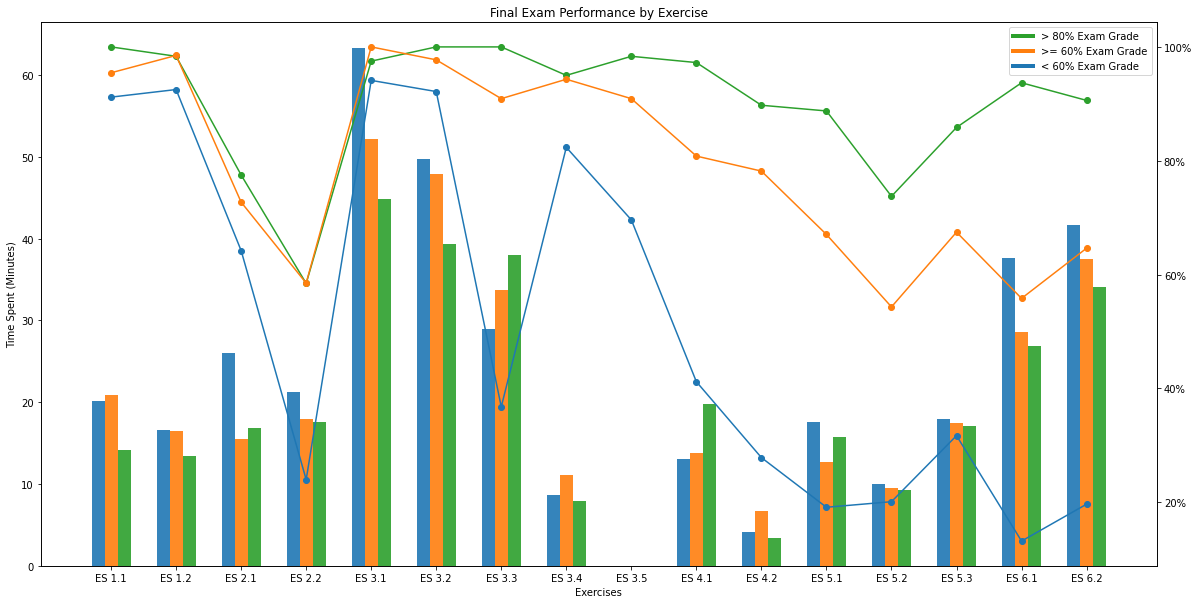

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Final Exam Performance by Exercise")
ax1.set_xlabel("Exercises")
ax1.set_ylabel("Time Spent (Minutes)")
x_labels = grades_final_norm[:-1].columns.str.extract('(ES [0-9].[0-9])', expand=False)[:-1]
x_axis = np.arange(len(x_labels))
ax1.bar(x_axis - 0.2, F_avg_es_time[:-1], 0.2, alpha=0.9)
ax1.bar(x_axis, B_avg_es_time[:-1], 0.2, alpha=0.9)
ax1.bar(x_axis + 0.2, A_avg_es_time[:-1], 0.2, alpha=0.9)

ax2 = ax1.twinx()
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax2.plot(x_labels, A_avg_es_grade[:-1], marker='o', color="tab:green")
ax2.plot(x_labels, B_avg_es_grade[:-1], marker='o', color="tab:orange")
ax2.plot(x_labels, F_avg_es_grade[:-1], marker='o', color="tab:blue")

custom_lines = [Line2D([0], [0], color="tab:green", lw=4),
                Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:blue", lw=4)]
ax2.legend(custom_lines,['> 80% Exam Grade', '>= 60% Exam Grade', '< 60% Exam Grade']);

# Time series forecasting

For our time series forecasting we want to predict when the student will switch from a study application to a non-study application. Our predictions are only relevant on a per student basis. We are using both start time and end time and so we have 1100 data points in our time series.

In [206]:
#choose a session number followed buy a student_Id e.g., [2,1]
#it might error if the student_Id is not in the session
A = cumsums.loc[2,1]
B = cumsums.loc[2,3]
F = cumsums.loc[2,2]

In [12]:
#save to csv for use in tableau dashboard
A.to_csv("/content/drive/MyDrive/MSAAI 530/Final Project/A_focus_time.csv")
B.to_csv("/content/drive/MyDrive/MSAAI 530/Final Project/B_focus_time.csv")
F.to_csv("/content/drive/MyDrive/MSAAI 530/Final Project/F_focus_time.csv")

In [207]:
F.head()

,exercise,activity,start_time,end_time,time_spent,cum_study,cum_time_spent
activity_en,,,,,,,
0,Es,Other,2014-10-16 11:23:38,2014-10-16 11:23:39,1,0.0,1.0
0,Es,Other,2014-10-16 11:23:40,2014-10-16 11:23:43,3,0.0,4.0
1,Es,Blank,2014-10-16 11:23:44,2014-10-16 11:23:47,3,3.0,7.0
1,Es_2_1,Deeds_Es_2_1,2014-10-16 11:23:48,2014-10-16 11:23:51,3,6.0,10.0
1,Es_2_1,TextEditor_Es_2_1,2014-10-16 11:23:52,2014-10-16 11:24:07,15,21.0,25.0


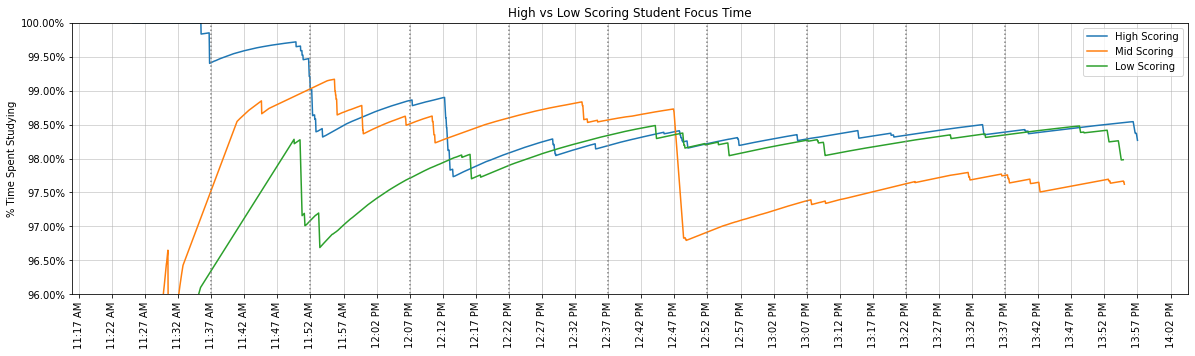

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(20,5))
# A student
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %p'))
ax.tick_params(axis='x', which='major', rotation=90)
ax.tick_params(axis='y', rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title(f"High vs Low Scoring Student Focus Time")
ax.set_ylim(0.96,1.0)
ax.set_ylabel("% Time Spent Studying")
ax.plot(A['end_time'], A["cum_study"]/A["cum_time_spent"], label="High Scoring")
ax.plot(B['end_time'], B["cum_study"]/B["cum_time_spent"], label="Mid Scoring")
ax.plot(F['end_time'], F["cum_study"]/F["cum_time_spent"], label = "Low Scoring")
ref = pd.Timestamp("2014-10-16 11:37")
delta = datetime.timedelta(minutes = 0)
for i in range (15,150,15):
  ax.plot([ref + delta, ref + delta],[0,100], color='grey', linestyle=":")
  delta = datetime.timedelta(minutes = i)
ax.legend()
ax.grid(linestyle='-', linewidth='0.5');

Below we use linear regression to predict the level of focus of the student over the course of one lab session.

In [283]:
#independent variable is time
ts = F[["end_time"]].applymap(lambda x: int(datetime.datetime.timestamp(x)))
#dependent variable is focus percentage
ys = F["cum_study"]/F["cum_time_spent"]

ph = 110 #how many seconds in the future
mu = 0.9 #how much of the past to remember

n_s = len(A.index)

tp_pred = np.zeros(n_s-1) #initialize array
yp_pred = np.zeros(n_s-1) #intialize array

for i in range(2, n_s+1):
  ts_tmp = ts[0:i] #increasing slices of ts
  ys_tmp = ys[0:i] #increasing slices of ys
  ns = len(ys_tmp)

  weights = np.ones(ns)*mu #initialize array of slice len
  for k in range(ns):
    weights[k] = weights[k]**k #weights for each slice
  weights = np.flip(weights, 0) #flip the weight order 

  lm_tmp = LinearRegression()
  model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)

  m_tmp = model_tmp.coef_
  q_tmp = model_tmp.intercept_

  # y = mx + b
  tp = ts.iloc[ns-1,0] + ph
  yp = m_tmp*tp + q_tmp

  tp_pred[i-2] = tp #save tp
  yp_pred[i-2] = yp #save yp

ys = ys.to_frame()

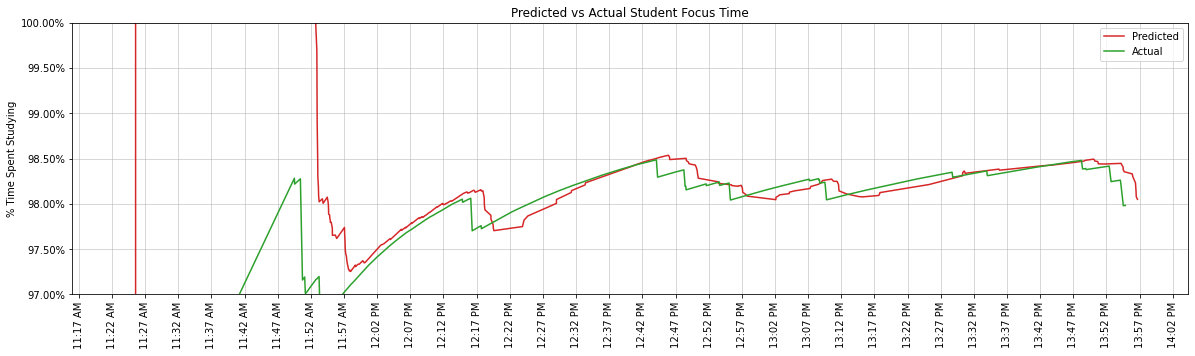

In [286]:
#plot real and predicted
fig, ax = plt.subplots(figsize=(20,5))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M %p'))
ax.tick_params(axis='x', which='major', rotation=90)
ax.tick_params(axis='y', rotation=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_ylim(0.97,1.0)
ax.set_title("Predicted vs Actual Student Focus Time")
ax.set_ylabel("% Time Spent Studying")
ax.plot(pd.to_datetime(tp_pred, unit='s'), yp_pred, label='Predicted', color='tab:red') 
ax.plot(pd.to_datetime(ts.iloc[0:n_s,0], unit='s'), ys.iloc[0:n_s,0], label='Actual', color='tab:green')
ax.legend()
ax.grid(linestyle='-', linewidth='0.5');